In [ ]:
# pip install pandas tensorflow

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv'
data = pd.read_csv(file_path)

Here we would like to put the data into the shape we want

In [ ]:

# Display the first few rows of the dataset to verify it's loaded correctly
print(data.head())

# Split dataset into input (X) and output (y) variables
X = data.iloc[:, :-1].values  # Assuming the last column is the target variable
y = data.iloc[:, -1].values

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check shapes of the datasets
print("Training set shape:", train_X.shape, train_y.shape)
print("Testing set shape:", test_X.shape, test_y.shape)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Training set shape: (614, 8) (614,)
Testing set shape: (154, 8) (154,)


Great it seems like everything is following my order, then What I should do in the next step?

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import Recall

# Define the model
model = Sequential([
    Dense(12, input_dim=8, activation='relu'),  # 8 features in the input layer
    Dense(8, activation='relu'),
    Dropout(0.1),  # Dropout layer added here with a dropout rate of 20%
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])



# Compile the model to include recall
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Recall()])



# Train the model
history = model.fit(train_X, train_y, epochs=100, batch_size=10, validation_split=0.2)


Epoch 1/100
50/50 [==============================] - 2s 8ms/step - loss: 0.7438 - accuracy: 0.4114 - recall_1: 0.7455 - val_loss: 0.6669 - val_accuracy: 0.6667 - val_recall_1: 0.6250
Epoch 2/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6745 - accuracy: 0.6395 - recall_1: 0.4667 - val_loss: 0.6455 - val_accuracy: 0.6829 - val_recall_1: 0.3125
Epoch 3/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6353 - accuracy: 0.6762 - recall_1: 0.2788 - val_loss: 0.6217 - val_accuracy: 0.6829 - val_recall_1: 0.2500
Epoch 4/100
50/50 [==============================] - 0s 4ms/step - loss: 0.6026 - accuracy: 0.7047 - recall_1: 0.2848 - val_loss: 0.5968 - val_accuracy: 0.6992 - val_recall_1: 0.2708
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 0.5783 - accuracy: 0.7088 - recall_1: 0.3152 - val_loss: 0.5700 - val_accuracy: 0.7236 - val_recall_1: 0.3333
Epoch 6/100
50/50 [==============================] - 0s 4ms/step - loss: 0.5531 - acc

5/5 [==============================] - 0s 9ms/step - loss: 0.6149 - accuracy: 0.7143 - recall_1: 0.5818
Model loss: 0.61
Model accuracy: 0.71
Model recall: 0.58


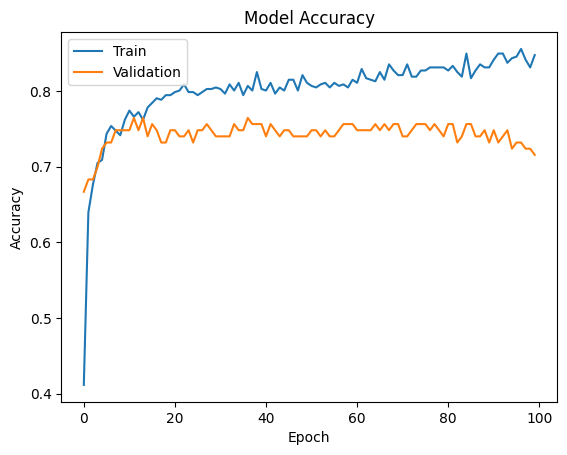

In [ ]:
# Evaluate the model and unpack all results
loss, accuracy, recall = model.evaluate(test_X, test_y)
print(f"Model loss: {loss:.2f}")
print(f"Model accuracy: {accuracy:.2f}")
print(f"Model recall: {recall:.2f}")


# Plot training history
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


## Model Evaluation Metrics

### Accuracy
Accuracy is one of the most common evaluation metrics used in machine learning. It represents the ratio of the number of correct predictions to the total number of input samples. It is particularly useful when the classes in the dataset are nearly balanced. Accuracy is calculated as:
\[ \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions Made}} \]

### Recall
Recall, also known as sensitivity or true positive rate, measures the proportion of actual positives that are correctly identified by the model. It is especially important when the cost of false negatives is high. For example, in medical screening tests, failing to detect a disease could have severe consequences. Recall is defined as:
\[ \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of True Positives} + \text{Number of False Negatives}} \]

Recall is crucial in situations where missing a positive instance is significantly worse than falsely identifying a negative instance as positive.

Both accuracy and recall provide valuable insights into the effectiveness of a model, helping to identify strengths and weaknesses in its predictive capabilities.


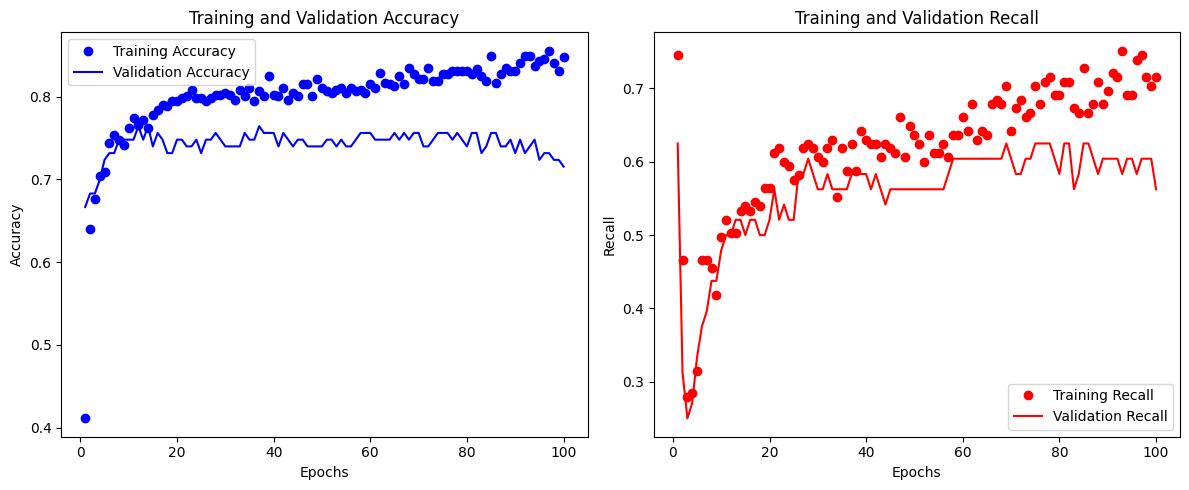

In [ ]:
import matplotlib.pyplot as plt

# First, verify and correct these keys according to your print statement's output
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
recall = history.history['recall_1']  # Adjusted key name for recall
val_recall = history.history['val_recall_1']  # Adjusted key name for validation recall
epochs = range(1, len(acc) + 1)

# Plot accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot recall
plt.subplot(1, 2, 2)
plt.plot(epochs, recall, 'ro', label='Training Recall')
plt.plot(epochs, val_recall, 'r', label='Validation Recall')
plt.title('Training and Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()

plt.tight_layout()
plt.show()


It seems like the model become worse after 80 epochs. Then I would use 50 epochs as my final model.

In [ ]:
# Define the model
model = Sequential([
    Dense(12, input_dim=8, activation='relu'),  # 8 features in the input layer
    Dense(8, activation='relu'),
    Dropout(0.1),  # Dropout layer added here with a dropout rate of 20%
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])



# Compile the model to include recall
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', Recall()])


history = model.fit(train_X, train_y, epochs=50, batch_size=10, validation_split=0.2)


Epoch 1/50
50/50 [==============================] - 2s 9ms/step - loss: 0.6494 - accuracy: 0.6314 - recall_2: 0.0727 - val_loss: 0.6500 - val_accuracy: 0.6098 - val_recall_2: 0.0000e+00
Epoch 2/50
50/50 [==============================] - 0s 3ms/step - loss: 0.5923 - accuracy: 0.6640 - recall_2: 0.0000e+00 - val_loss: 0.6224 - val_accuracy: 0.6098 - val_recall_2: 0.0000e+00
Epoch 3/50
50/50 [==============================] - 0s 4ms/step - loss: 0.5569 - accuracy: 0.6640 - recall_2: 0.0000e+00 - val_loss: 0.6003 - val_accuracy: 0.6098 - val_recall_2: 0.0000e+00
Epoch 4/50
50/50 [==============================] - 0s 4ms/step - loss: 0.5335 - accuracy: 0.6640 - recall_2: 0.0000e+00 - val_loss: 0.5837 - val_accuracy: 0.6179 - val_recall_2: 0.0417
Epoch 5/50
50/50 [==============================] - 0s 4ms/step - loss: 0.5152 - accuracy: 0.7149 - recall_2: 0.1818 - val_loss: 0.5601 - val_accuracy: 0.6504 - val_recall_2: 0.2292
Epoch 6/50
50/50 [==============================] - 0s 4ms/step - 

Again evaluate our model

5/5 [==============================] - 0s 4ms/step - loss: 0.5707 - accuracy: 0.7273 - recall_2: 0.6000
Model loss: 0.57
Model accuracy: 0.73
Model recall: 0.60


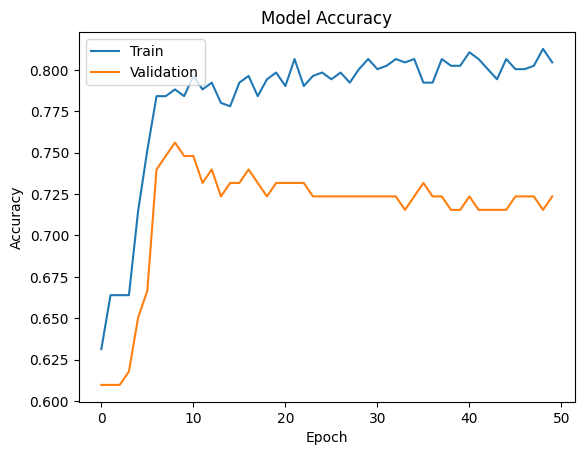

In [ ]:
# Evaluate the model and unpack all results
loss, accuracy, recall = model.evaluate(test_X, test_y)
print(f"Model loss: {loss:.2f}")
print(f"Model accuracy: {accuracy:.2f}")
print(f"Model recall: {recall:.2f}")


# Plot training history
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


So we could make prediction using the model!